In [1]:
from sklearn.decomposition import PCA
import os
import pandas as pd
import seaborn as sns
import seaborn as sn
import numpy as np
import statsmodels.api as sm

import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

#Redes neuronales
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout
from keras.layers import BatchNormalization
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
from keras.callbacks import EarlyStopping

import warnings


In [142]:
df_1 =pd.read_csv("Video_juegos.csv", sep=",")

In [143]:

print(df_1.columns.values)

['Name' 'Platform' 'Year_of_Release' 'Genre' 'Publisher' 'NA_Sales'
 'EU_Sales' 'JP_Sales' 'Other_Sales' 'Global_Sales' 'Critic_Score'
 'Critic_Count' 'User_Score' 'User_Count' 'Developer' 'Rating']


In [144]:
columnas_dropear = ['Developer','Critic_Score', 'Critic_Count', 'User_Score', 'User_Count','Rating','Name', 'JP_Sales', 'EU_Sales', 'NA_Sales', 'Other_Sales']

df_1.drop(columnas_dropear, axis=1, inplace = True)

In [145]:
df_1.head()

,Platform,Year_of_Release,Genre,Publisher,Global_Sales
0,Wii,2006.0,Sports,Nintendo,82.53
1,NES,1985.0,Platform,Nintendo,40.24
2,Wii,2008.0,Racing,Nintendo,35.52
3,Wii,2009.0,Sports,Nintendo,32.77
4,GB,1996.0,Role-Playing,Nintendo,31.37


In [146]:
df_1.isna().sum()

Platform             0
Year_of_Release    269
Genre                2
Publisher           54
Global_Sales         0
dtype: int64

In [147]:
df_1['Year_of_Release'] = df_1['Year_of_Release']. fillna(df_1['Year_of_Release'].mean())


In [148]:
df_1 = df_1.dropna(axis=0)

In [149]:
df_1.isna().sum()

Platform           0
Year_of_Release    0
Genre              0
Publisher          0
Global_Sales       0
dtype: int64

In [150]:
df_1['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

<ipython-input-151-7d10a84acf6c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_platform.index, y=sales_by_platform.values, palette='Set2')


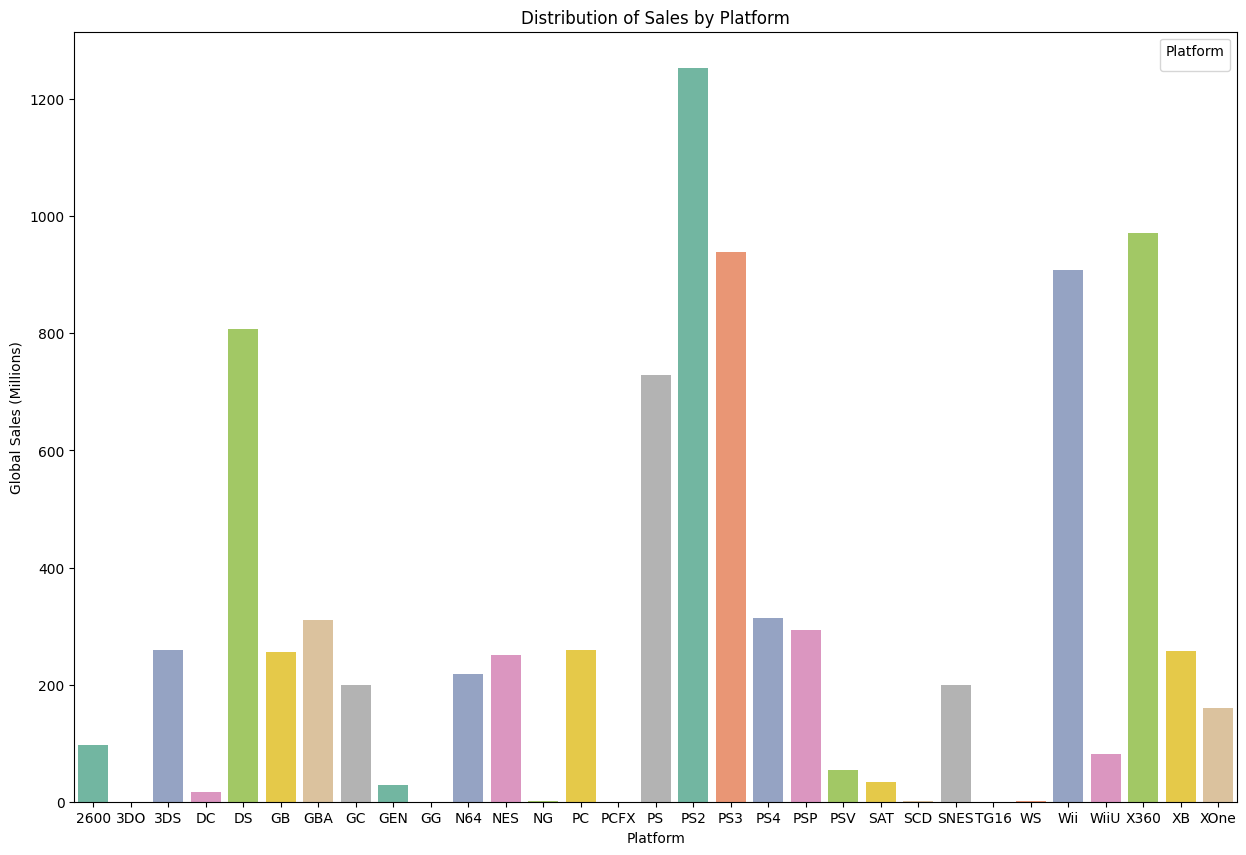

In [151]:
sales_by_platform = df_1.groupby('Platform')['Global_Sales'].sum()

plt.figure(figsize=(15, 10))
sns.barplot(x=sales_by_platform.index, y=sales_by_platform.values, palette='Set2')
plt.xlabel('Platform')
plt.ylabel('Global Sales (Millions)')
plt.title('Distribution of Sales by Platform')
plt.legend(title='Platform')
plt.show()

In [152]:
df_1['Platform'].nunique()

31

<ipython-input-153-16b4cccb92d3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Platform', data=df_1, palette='Set2')


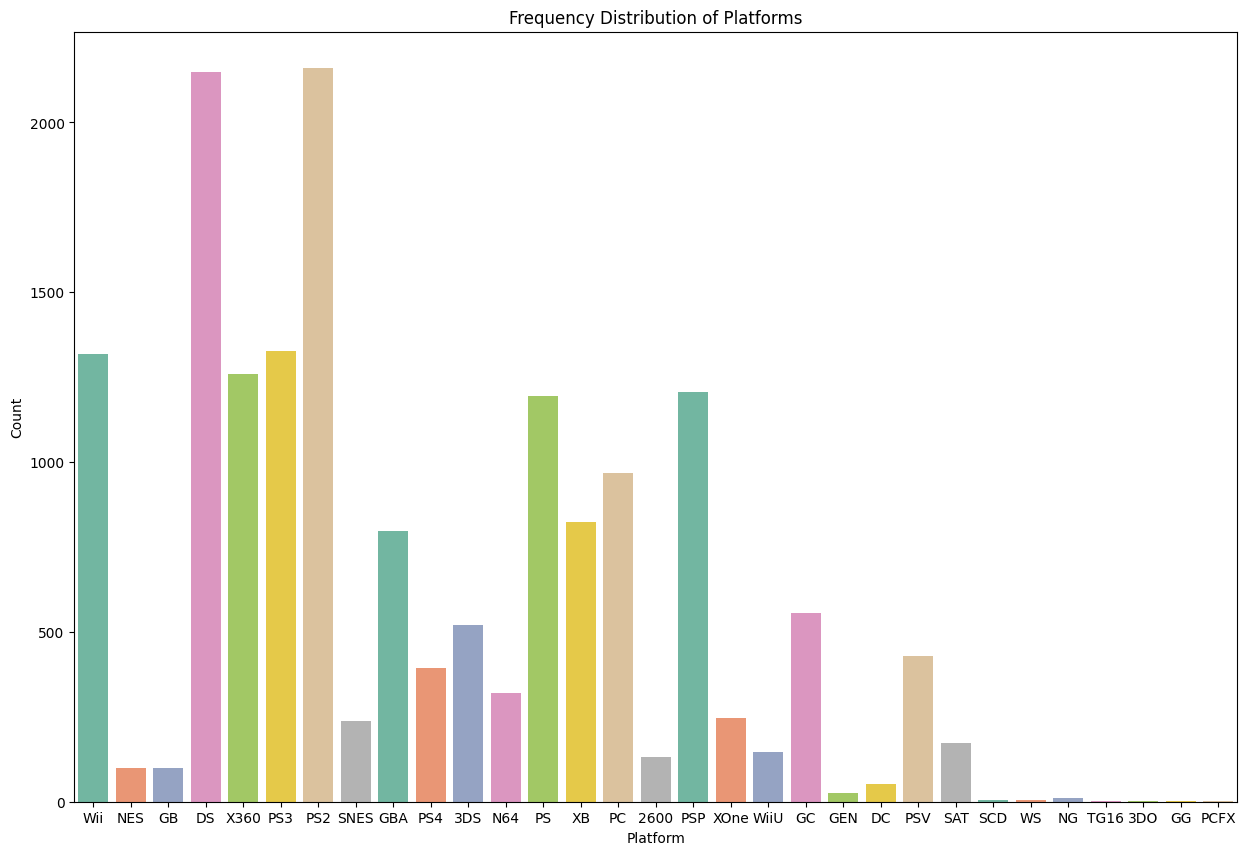

In [153]:

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
sns.countplot(x='Platform', data=df_1, palette='Set2')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.title('Frequency Distribution of Platforms')
plt.show()


In [154]:
consola_mesa = ["NES","SNES","N64","PS","PS2", "PS3", "PS4", "XB", "X360", "XOne", "Wii", "GC",
                "GEN", "DC", "2600", "TG16", "3DO", "SAT","Sega CD", "PCFX", "SCD"]

consola_mano= ["GB", "GBA", "DS", "3DS", "PSP", "PSV", "WS", "NG", "WiiU", "GG"]

pc = ["PC"]

In [155]:

df_1['Platform'] = df_1['Platform'].apply(lambda x: 'Consola_Mesa' if x in consola_mesa else x)
df_1['Platform'] = df_1['Platform'].apply(lambda x: 'Consola_Mano' if x in consola_mano else x)
df_1['Platform'] = df_1['Platform'].apply(lambda x: 'PC' if x in pc else x)

df_1['Platform'].value_counts()


Platform
Consola_Mesa    10332
Consola_Mano     5363
PC                968
Name: count, dtype: int64

In [ ]:
sales_by_platform = df_1.groupby('Platform')['Global_Sales'].sum()

plt.figure(figsize=(15, 10))
sns.barplot(x=sales_by_platform.index, y=sales_by_platform.values, palette='Set2')
plt.xlabel('Platform')
plt.ylabel('Global Sales (Millions)')
plt.title('Distribution of Sales by Platform')
plt.legend(title='Platform')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
sns.countplot(x='Platform', data=df_1, palette='Set2')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.title('Frequency Distribution of Platforms')
plt.show()

In [158]:
df_1['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [156]:
counts = df_1['Publisher'].value_counts()

In [157]:
df_1['Publisher'].nunique()


581

In [159]:
def assign_publisher_type(publisher):
    if counts[publisher] < 100:
        return "Small Publisher"
    else:
        return publisher


In [160]:
df_1["Publisher"] = df_1["Publisher"].apply(assign_publisher_type)

In [161]:
df_1['Publisher'].nunique()

30

In [162]:
counts = df_1['Publisher'].value_counts()
print(counts)

Publisher
Small Publisher                           4535
Electronic Arts                           1356
Activision                                 985
Namco Bandai Games                         939
Ubisoft                                    933
Konami Digital Entertainment               834
THQ                                        715
Nintendo                                   706
Sony Computer Entertainment                687
Sega                                       638
Take-Two Interactive                       422
Capcom                                     386
Atari                                      367
Tecmo Koei                                 348
Warner Bros. Interactive Entertainment     235
Square Enix                                234
Disney Interactive Studios                 218
Unknown                                    201
Midway Games                               198
Eidos Interactive                          198
Microsoft Game Studios                     191
505

<ipython-input-170-53665893178d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Publisher', data=df_1, palette='Set2')


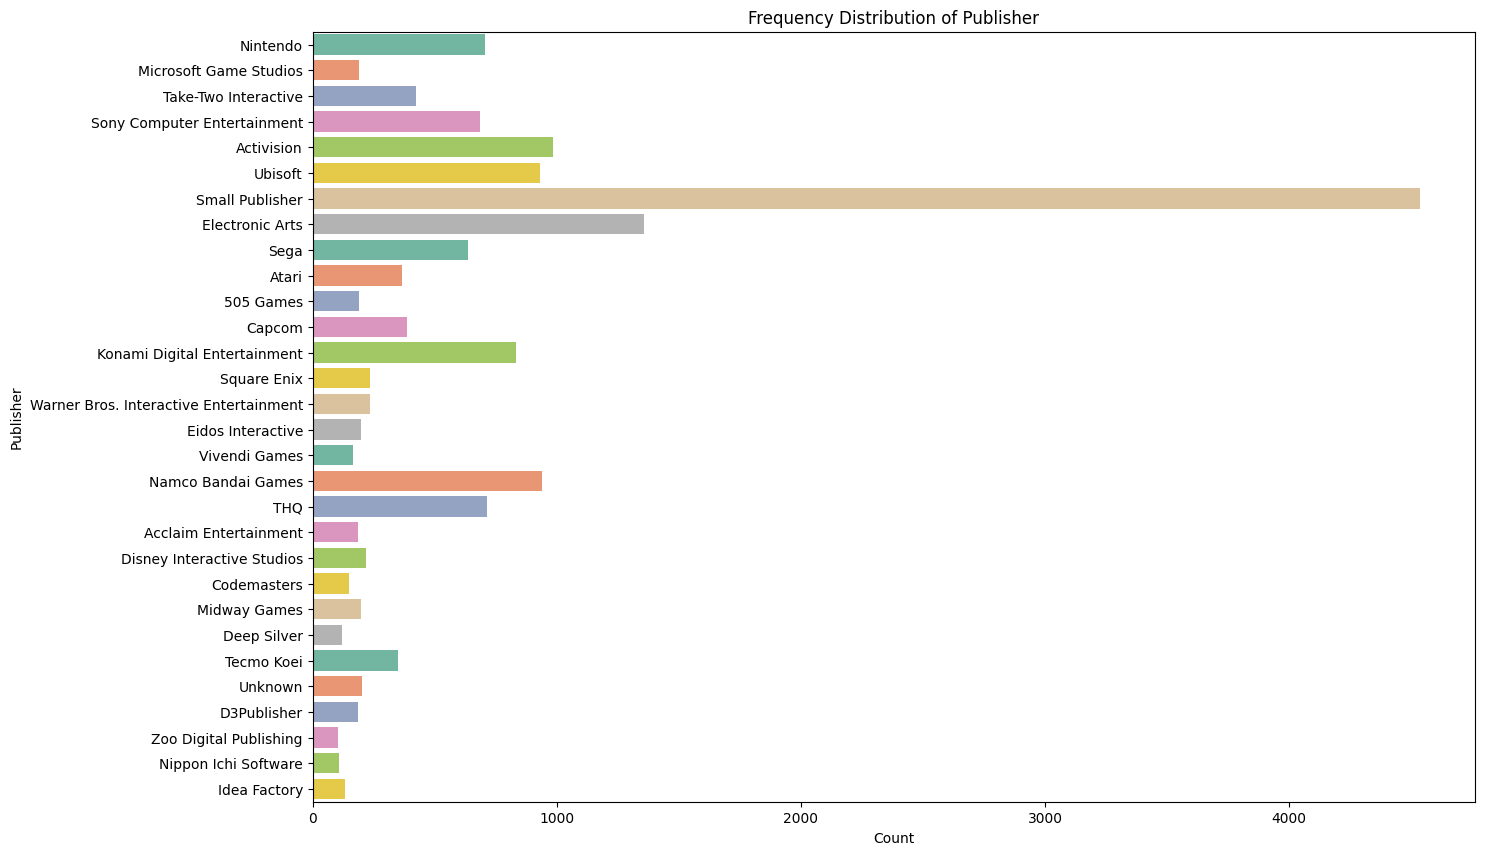

In [170]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
sns.countplot(y='Publisher', data=df_1, palette='Set2')
plt.ylabel('Publisher')
plt.xlabel('Count')
plt.title('Frequency Distribution of Publisher')
plt.show()


<ipython-input-171-4b67ecf0483e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_platform.index, y=sales_by_platform.values, palette='Set2')


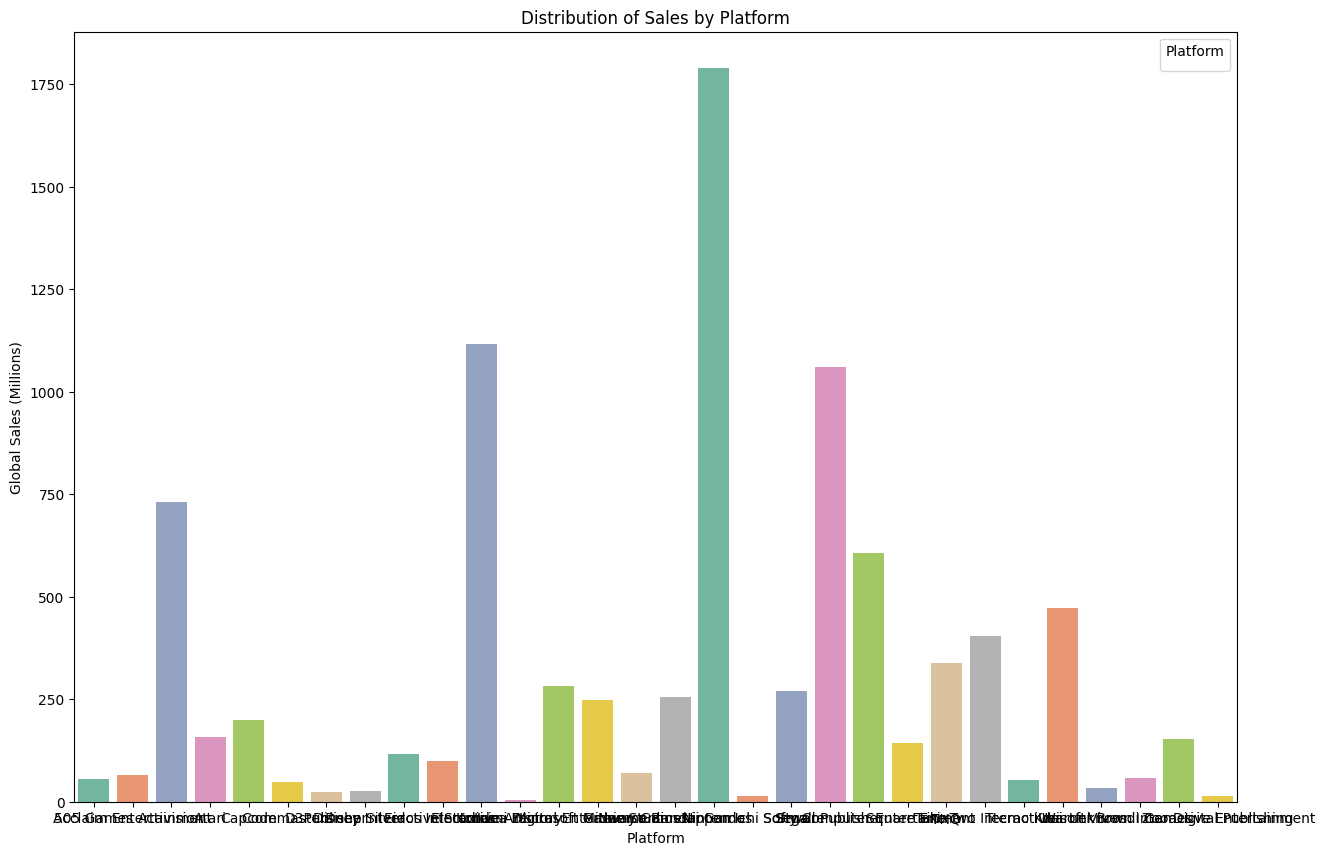

In [171]:
sales_by_platform = df_1.groupby('Publisher')['Global_Sales'].sum()

plt.figure(figsize=(15, 10))
sns.barplot(x=sales_by_platform.index, y=sales_by_platform.values, palette='Set2')
plt.xlabel('Platform')
plt.ylabel('Global Sales (Millions)')
plt.title('Distribution of Sales by Platform')
plt.legend(title='Platform')
plt.show()

In [172]:
df_1.head()

,Platform,Year_of_Release,Genre,Publisher,Global_Sales
0,Consola_Mesa,2006.0,Sports,Nintendo,82.53
1,Consola_Mesa,1985.0,Platform,Nintendo,40.24
2,Consola_Mesa,2008.0,Racing,Nintendo,35.52
3,Consola_Mesa,2009.0,Sports,Nintendo,32.77
4,Consola_Mano,1996.0,Role-Playing,Nintendo,31.37


In [173]:
onehot_columns = ['Platform', 'Genre', 'Publisher']

In [174]:
def onehot_encode(data, columns):
  for column in columns:
    dummies = pd.get_dummies(data[column], dtype='int')
    data = pd.concat([data, dummies], axis = 1)
    data.drop(column, axis=1, inplace=True)
  return data

In [175]:
df_1 = onehot_encode(df_1,onehot_columns)

In [176]:
df_1


,Year_of_Release,Global_Sales,Consola_Mano,Consola_Mesa,PC,Action,Adventure,Fighting,Misc,Platform,...,Sony Computer Entertainment,Square Enix,THQ,Take-Two Interactive,Tecmo Koei,Ubisoft,Unknown,Vivendi Games,Warner Bros. Interactive Entertainment,Zoo Digital Publishing
0,2006.0,82.53,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1985.0,40.24,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2008.0,35.52,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2009.0,32.77,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1996.0,31.37,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,2016.0,0.01,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
16715,2006.0,0.01,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16716,2016.0,0.01,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16717,2003.0,0.01,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [177]:
x = df_1.drop('Global_Sales', axis =1)
y = df_1['Global_Sales']

In [178]:
x

,Year_of_Release,Consola_Mano,Consola_Mesa,PC,Action,Adventure,Fighting,Misc,Platform,Puzzle,...,Sony Computer Entertainment,Square Enix,THQ,Take-Two Interactive,Tecmo Koei,Ubisoft,Unknown,Vivendi Games,Warner Bros. Interactive Entertainment,Zoo Digital Publishing
0,2006.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1985.0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2008.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2009.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1996.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,2016.0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
16715,2006.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16716,2016.0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16717,2003.0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [179]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [180]:
x.shape

(16663, 46)

In [181]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [182]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 4.3 MB/s eta 0:00:00


In [183]:
from tensorflow_addons.metrics import RSquare
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import plot_model
from keras.initializers import GlorotNormal
from keras.regularizers import l2
from keras import layers
from keras import regularizers
from keras import initializers

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [184]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.1 MB/s eta 0:00:00


In [185]:
import kerastuner  as kt
from keras.initializers import GlorotNormal
from keras.optimizers import Adam
from keras.layers import  Dropout
from sklearn.model_selection import train_test_split

def coeff_determination(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - (SS_res/SS_tot))

def summary_regress(actual, predicted):
    a=mean_absolute_error(actual, predicted)
    b=mean_squared_error(actual, predicted)
    c= mean_squared_error(actual, predicted)**(1/2)
    d=r2_score(actual, predicted)
    return round(a,2),round(b,2),round(c,2),round(d,2)

def summary_train_val_test(y_train_obs, y_train_pred,y_val_obs, y_val_pred,y_test_obs, y_test_pred):
  train=summary_regress(y_train_obs,y_train_pred)
  val=summary_regress(y_val_obs,y_val_pred)
  test=summary_regress(y_test_obs,y_test_pred)
  df=pd.DataFrame([train,val,test],index=["Train","Val","Test"],columns=["MAE","MSE","RMSE","R2"])
  return df

<ipython-input-185-7df48772e841>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner  as kt


In [194]:

def build_model(hp):
    seed_value=34
    tf.random.set_seed(seed_value)
    hp_learning_rate = hp.Choice('learning_rate', values = [0.001, 0.01, 0.1])

    initializer = GlorotNormal(seed=seed_value)
    optimizer1 = Adam(learning_rate=hp_learning_rate)

    model = Sequential()
    model.add(Dense(units=hp.Int('layers_units_x', 16, 64, step=4), input_dim = X_train.shape[1] ,  kernel_initializer=initializer, activation='relu'))

    for i in range(hp.Int('layers_', 1, 3)):
        use_batch_norm = hp.Boolean('batch_norm_' + str(i))
        if use_batch_norm:
            model.add(BatchNormalization())
        model.add(Dropout(rate=hp.Choice('dp_rate_'+ str(i), values = [0.25, 0.5, 0.75])))
        model.add(Dense(units=hp.Int('units_' + str(i), 2, 64, step=2),activation="relu",kernel_initializer=initializer))

    model.add(Dense(1, activation='linear'))

    model.compile(optimizer=optimizer1, loss='mse',metrics=['mean_absolute_percentage_error','mae',coeff_determination])
    return model


In [195]:
tuner = kt.RandomSearch(build_model,
                     objective = 'val_loss',
                     executions_per_trial=1,
                     max_trials=50,
                     directory = '/content/Juegos',
                     project_name='Randomsearch_2',
                     )

In [196]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")

X_train shape: (10664, 46)
y_train shape: (10664,)
X_val shape: (2666, 46)
y_val shape: (2666,)


In [197]:
tuner.search(X_train, y_train,epochs=20,verbose=0,validation_data=(X_val, y_val), batch_size= 32)

In [198]:
best_model1=tuner.get_best_models(num_models=1)[0]
#best_model2=tuner.get_best_models(num_models=2)[1]
#best_model3=tuner.get_best_models(num_models=3)[2]

In [199]:
best_hps1 = tuner.get_best_hyperparameters(num_trials = 5)[0].values
#best_hps2 = tuner.get_best_hyperparameters(num_trials = 5)[1].values
#best_hps3 = tuner.get_best_hyperparameters(num_trials = 5)[2].values

In [200]:
lrt1=best_hps1['learning_rate']
#lrt2=best_hps2['learning_rate']
#lrt3=best_hps3['learning_rate']

In [201]:
print("Learning Rate 1", lrt1)
#print("Learning Rate 2", lrt2)
#print("Learning Rate 3", lrt3)

Learning Rate 1 0.01


In [202]:
best_model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                3008      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 18)                1170      
                                                                 
 batch_normalization (Batch  (None, 18)                72        
 Normalization)                                                  
                                                                 
 dropout_1 (Dropout)         (None, 18)                0         
                                                                 
 dense_2 (Dense)             (None, 54)                1026      
                                                        

In [203]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [204]:
ytrain_pred=best_model1.predict(X_train,verbose=0)
yval_pred=best_model1.predict(X_val,verbose=0)
ytest_pred=best_model1.predict(X_test,verbose=0)

summary_train_val_test(y_train,ytrain_pred,y_val,yval_pred,y_test,ytest_pred)

,MAE,MSE,RMSE,R2
Train,0.50,1.67,1.29,0.16
Val,0.50,1.48,1.21,0.21
Test,0.54,3.74,1.93,0.10


In [ ]:
keras.utils.plot_model(
    best_model1,
    to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=200,
    show_layer_activations=True,
    show_trainable=True,
)

In [205]:

best_model1.save('model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [223]:
best_model1 = keras.models.load_model('model.h5', custom_objects = {'coeff_determination': coeff_determination})

In [225]:
history = best_model1.fit(X_train, y_train, epochs=2000, batch_size=32, validation_data=(X_test, y_test), verbose=0)

In [226]:
ytrain_pred=best_model1.predict(X_train,verbose=0)
yval_pred=best_model1.predict(X_val,verbose=0)
ytest_pred=best_model1.predict(X_test,verbose=0)

summary_train_val_test(y_train,ytrain_pred,y_val,yval_pred,y_test,ytest_pred)

,MAE,MSE,RMSE,R2
Train,0.43,1.35,1.16,0.32
Val,0.46,1.67,1.29,0.11
Test,0.49,3.69,1.92,0.11


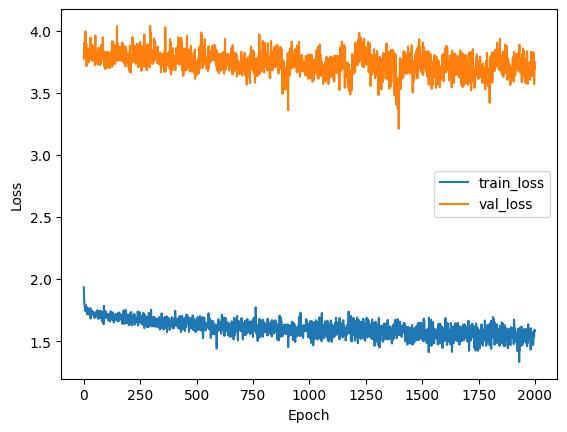

In [227]:

import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [228]:
r2 = history.history['val_coeff_determination'][-1]
print(f"R2: {r2}")

R2: 0.01588187925517559


In [229]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 3.8 MB/s eta 0:00:00


In [231]:
import shap

In [232]:
shap.initjs()

In [233]:
explainer = shap.KernelExplainer(best_model1, X_train)

In [234]:
X_test.shape

(3333, 46)

In [239]:
shap_values = explainer.shap_values(X_test[0:500,:], nsamples=46)

  0%|          | 0/500 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.810e-01, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.490e-01, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 8 iterations, i.e. alpha=1.287e-01, with an active set of 8 regressors, and the smallest cholesky pivot element being 2

In [240]:
shap_values.shape

(500, 46, 1)

In [241]:
shap_values=shap_values.reshape(500, 46)

In [242]:
features=df_1.drop('Global_Sales', axis =1).columns

In [243]:
features

Index(['Year_of_Release', 'Consola_Mano', 'Consola_Mesa', 'PC', 'Action',
       'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing',
       'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy',
       '505 Games', 'Acclaim Entertainment', 'Activision', 'Atari', 'Capcom',
       'Codemasters', 'D3Publisher', 'Deep Silver',
       'Disney Interactive Studios', 'Eidos Interactive', 'Electronic Arts',
       'Idea Factory', 'Konami Digital Entertainment',
       'Microsoft Game Studios', 'Midway Games', 'Namco Bandai Games',
       'Nintendo', 'Nippon Ichi Software', 'Sega', 'Small Publisher',
       'Sony Computer Entertainment', 'Square Enix', 'THQ',
       'Take-Two Interactive', 'Tecmo Koei', 'Ubisoft', 'Unknown',
       'Vivendi Games', 'Warner Bros. Interactive Entertainment',
       'Zoo Digital Publishing'],
      dtype='object')

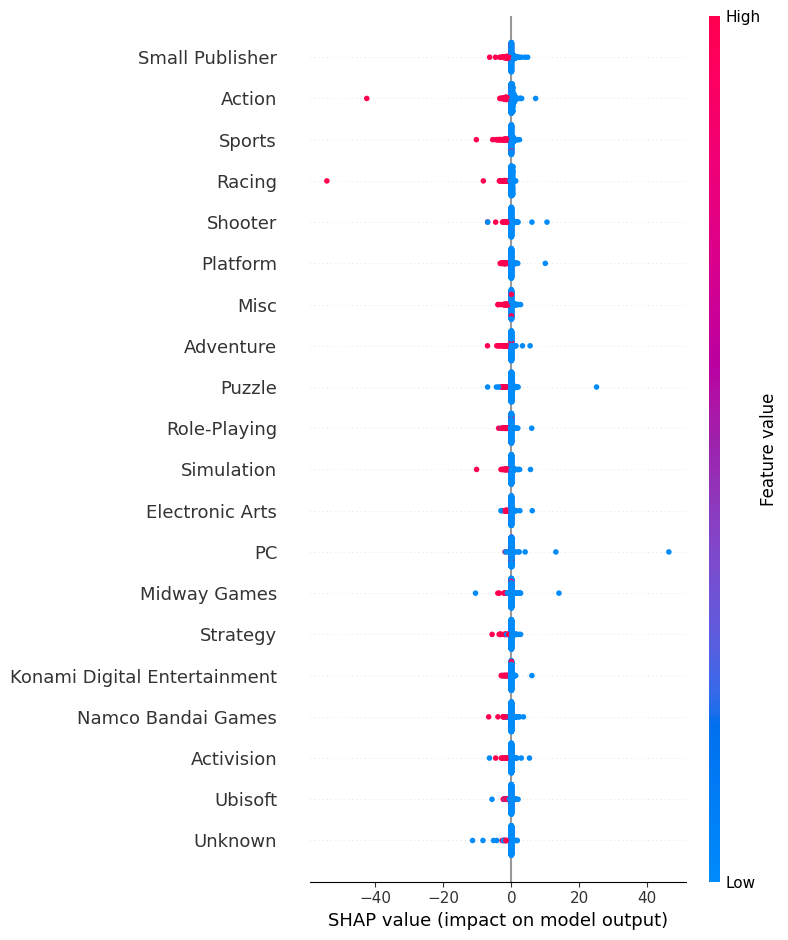

In [244]:
shap.summary_plot(shap_values,X_test[0:500,:],feature_names=features)

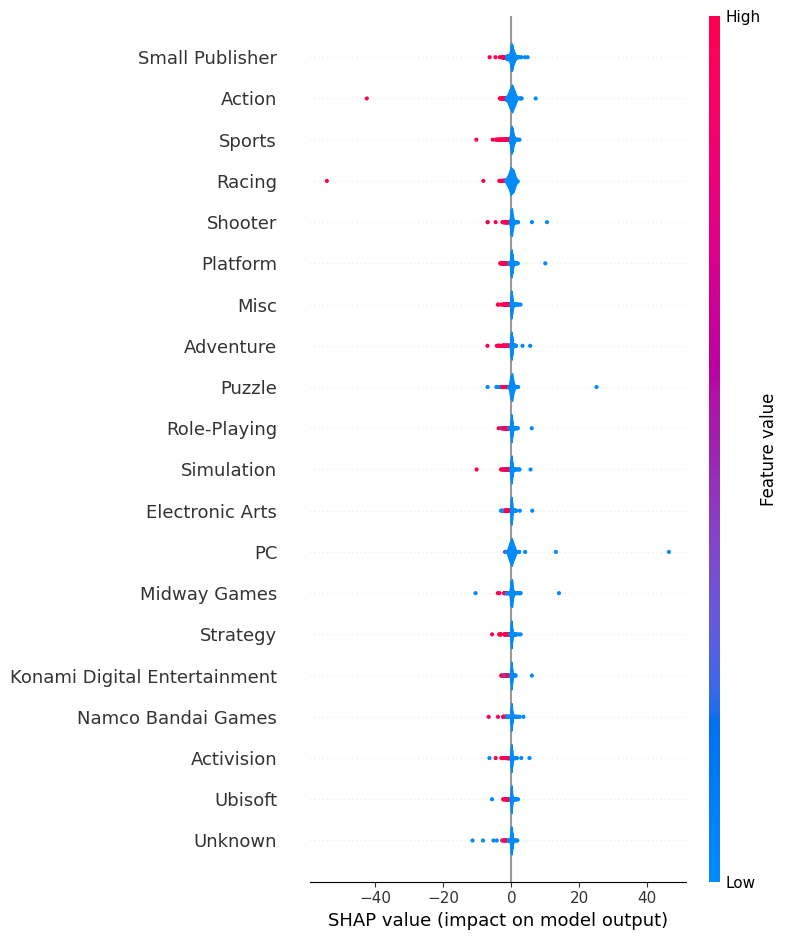

In [247]:
shap.summary_plot(shap_values,X_test[0:500,:],plot_type='violin',feature_names=features)

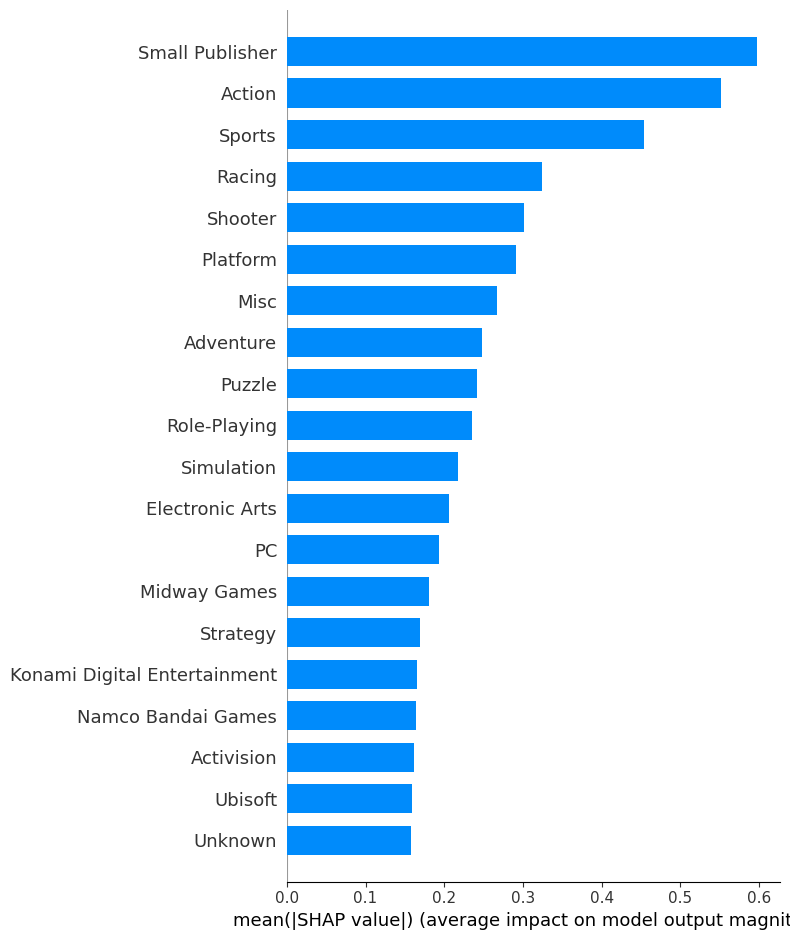

In [245]:
shap.summary_plot(shap_values, plot_type = 'bar',feature_names=features)

In [251]:
shap.initjs()
q=10
shap.force_plot(explainer.expected_value,shap_values[q,:],X_test[q,:],feature_names=features)

In [249]:

shap.force_plot(explainer.expected_value,shap_values[q,:],X_test[q,:],feature_names=features)
